# Gradient Boosting Classification

Statsquest : https://www.youtube.com/watch?v=jxuNLH5dXCs&list=PLblh5JKOoLUJjeXUvUE0maghNuY2_5fY6&index=3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

When we use Gradient Boost for classification the inital prediction (__pred1__) here will be __log (odds)__ insted of the mean we used to take in regression.

### Step : 1

__<span class="mark">Log(odds) is used instead of mean for classification.</span>__

<br></br>
$$Log\;(odds\;for\;1's)\;\;=\;\;Log\;\bigg(\frac{number\;of\;Yes\;events\;(1's)}{number\;of\;No\;events\;(0's)}\bigg)$$


<br></br>
<span class="mark">Now, we will convert Log odds into probability using __Logistic Function__:</span>

$$So\;the\;probability\;of\;1's\;occuring\;=\;\frac{e^{log(odds)}}{1+e^{log(odds)}}$$

<br></br>
___Note: If the probability of 1's occuring is greater than 0.5 then, prediction of all the row's pred1 will be 1 else 0___

In [2]:
trolls = pd.read_excel(r'classification.xlsx')
trolls

,likes_popcorn,age,favourite_color,loves_trolls2
0,1,12,Blue,1
1,1,87,Green,1
2,0,44,Blue,0
3,1,19,Red,0
4,0,32,Green,1
5,0,14,Blue,1


- __YES = 4, NO = 2__


- __YES >> NO__


>__log(4/2) = 0.6931__

In [3]:
log_odds = np.log(4/2)
log_odds

0.6931471805599453

In [4]:
prob = np.exp(log_odds)/(1+np.exp(log_odds))
prob

0.6666666666666666

so probability of loving trolls = 0.6667 >> 0.5

so all values in datatset wiil be classified as 1.

In [5]:
trolls['pred1'] = prob
trolls

,likes_popcorn,age,favourite_color,loves_trolls2,pred1
0,1,12,Blue,1,0.666667
1,1,87,Green,1,0.666667
2,0,44,Blue,0,0.666667
3,1,19,Red,0,0.666667
4,0,32,Green,1,0.666667
5,0,14,Blue,1,0.666667


#### probability of loving trolls 2

$$\frac{e^{log(odds)}}{1+e^{log(odds)}}$$


$$\frac{e^{log(\frac{4}{2})}}{1+e^{log(\frac{4}{2})}}$$

In [6]:
print(f'the log_of_odds is : {log_odds}')
print(f'the probability is : {prob}')
print(f'the prediction is : 1')

the log_of_odds is : 0.6931471805599453
the probability is : 0.6666666666666666
the prediction is : 1


#### Step : 2

residual (res1) = actual output - log(odds).

$$Residual\;=\;(Observed\;-\;Actual)$$

Hence, we have calculated the Residuals for the leaf's initial Prediction in res1.

In [7]:
trolls['res1'] = trolls['loves_trolls2'] - trolls['pred1']
trolls

,likes_popcorn,age,favourite_color,loves_trolls2,pred1,res1
0,1,12,Blue,1,0.666667,0.333333
1,1,87,Green,1,0.666667,0.333333
2,0,44,Blue,0,0.666667,-0.666667
3,1,19,Red,0,0.666667,-0.666667
4,0,32,Green,1,0.666667,0.333333
5,0,14,Blue,1,0.666667,0.333333


#### Step 4 : 
    
We will build a Decision Tree with X = [likes_popcorn, age, favourite_color] and y = [res1] that will predict the res1

pred2 = Values from the decision tree of model2 

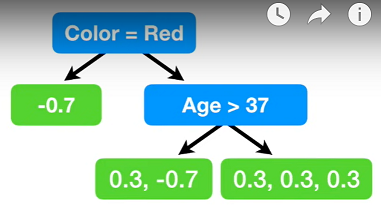

> Note: In Case of Regression we used to take mean of each leaf node. We can't use the same in Classification as these leaf have probability values

But in Classification we use:

In [8]:
trolls

,likes_popcorn,age,favourite_color,loves_trolls2,pred1,res1
0,1,12,Blue,1,0.666667,0.333333
1,1,87,Green,1,0.666667,0.333333
2,0,44,Blue,0,0.666667,-0.666667
3,1,19,Red,0,0.666667,-0.666667
4,0,32,Green,1,0.666667,0.333333
5,0,14,Blue,1,0.666667,0.333333


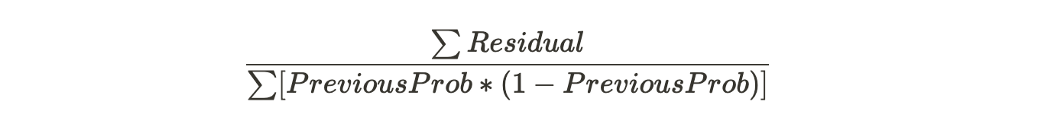

where,

numerator is sum of all residuals in that particular leaf.

Denominator is Previously Predicted Probabilities of each residual * (1 - Previously Predicted Probabilities of each residual)

### So for leaf with value - 0.7 i.e row[3]


$$Output\;value = \frac{-0.7}{0.7*(1-0.7)}\;=\;-3.3$$


Here Previous probability (pred1) will be 0.7
<br></br>


### Now for leaf with 0.3 and -0.7 i.e row[1] and row[2]


$$Output\;value = \frac{0.3\;+\;(-0.7)}{(0.7*(1-0.7))+(0.7*(1-0.7))}$$

$$Output\;value = \frac{0.3\;+\;(-0.7)}{2*(0.7*(1-0.7))}\;=\;-1$$

Here Previous probability (pred1) will be 0.7

<br></br>
### Now for leaf with 0.3, 0.3 and 0.3 i.e row[0], row[4] and row[5]

$$Output\;value = \frac{0.3\;+\;0.3\;+\;0.3}{3*(0.7*(1-0.7))}\;=\;1.4$$

Here Previous probability (pred1) will be 0.7

<br></br>

##### NOTE: previous probability will be different for different trees

### Now updating the new_probability (p_1) for each row

<br></br>
$$new_{log(odd)}\;=\;older_{log(odd)}\;+\;learning\;rate\;*\;output\;value\;of\;the\;leaf\;which\;has\;that\;row$$

<br></br>
with $\eta$ = 0.8


##### for leaf with 0.3, 0.3 and 0.3 i.e row[0], row[4] and row[5]

new_log(odd) prediction = 0.7 + 0.8 * 1.4 = 1.8

New_probability = $\frac{e^{1.8}}{1+e^{1.8}}\;=\;0.9$
<br></br>

##### for leaf with 0.3 and -0.7 i.e row[1] and row[2]

new_log(odd) prediction = 0.7 + 0.8 * (-1) = -0.1

New_probability = $\frac{e^{-0.1}}{1+e^{-0.1}}\;=\;0.5$


### For new predictions

- step1 : we get the leaf value from each tree.


- step2 : final_log(odds) = initial_log(odds) + sum of values from each tree * learning rate



- step3 : then this value goes through $\frac{e^{log(odds)}}{1+e^{log(odds)}}$ and we get result in terms of probability

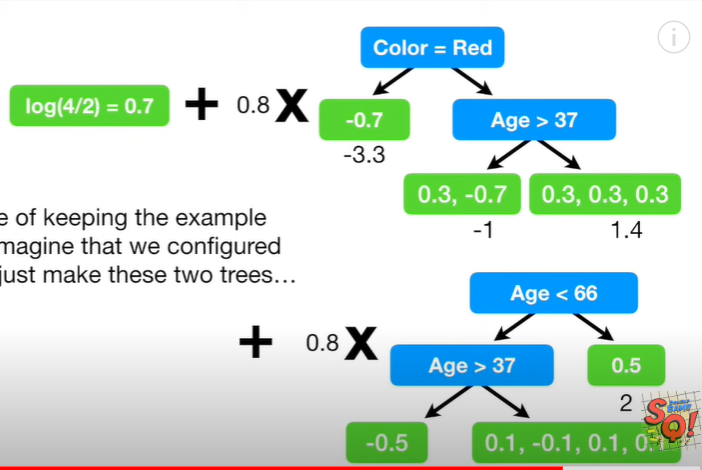

____
____

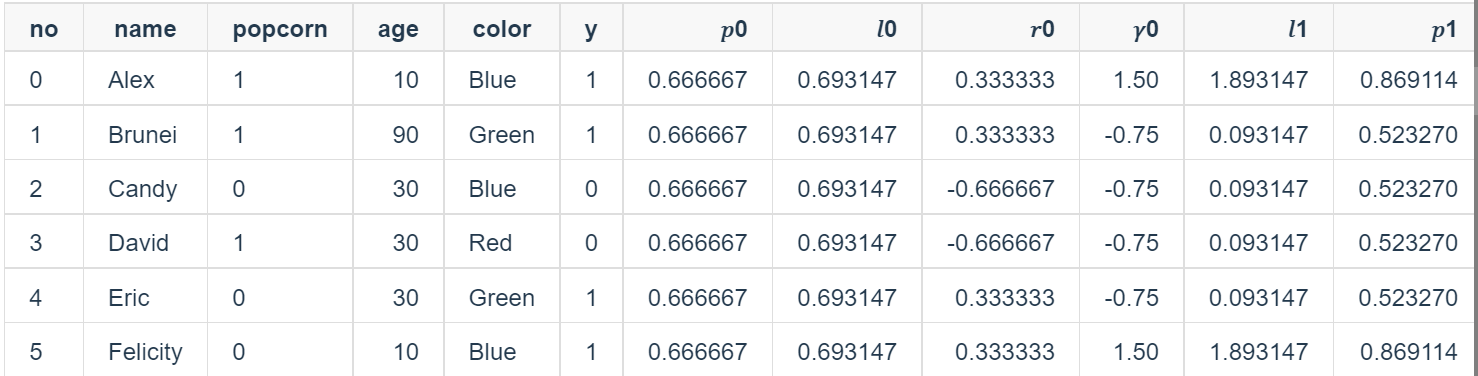

p_0 is initial probability

l_0 is initial log_odd

r_0 is the initial residual (y - p_0)

y_0 is the gamma which is sum of 

l_1 is the second log_odd 

p_1 is the new predicted probability

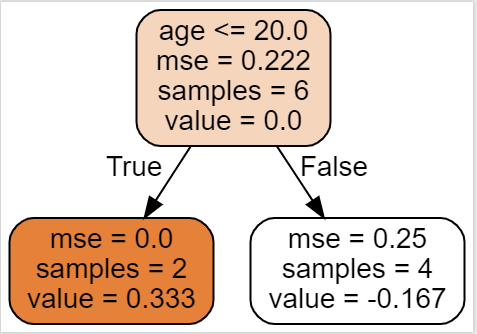

### NOTE: in next iteration residual (r2) will be calculated on the new predicted probability(p_1) i.e (y - new predicted probability)

#### for next decision tree

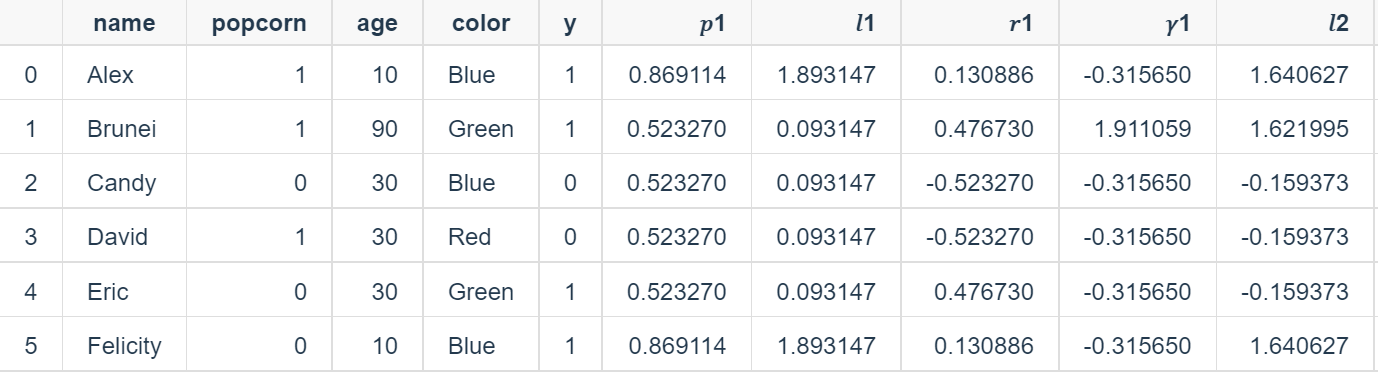

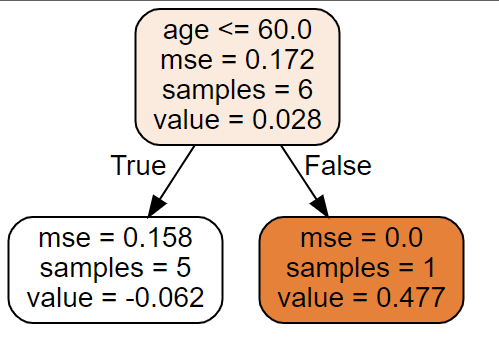

#### for next decision tree

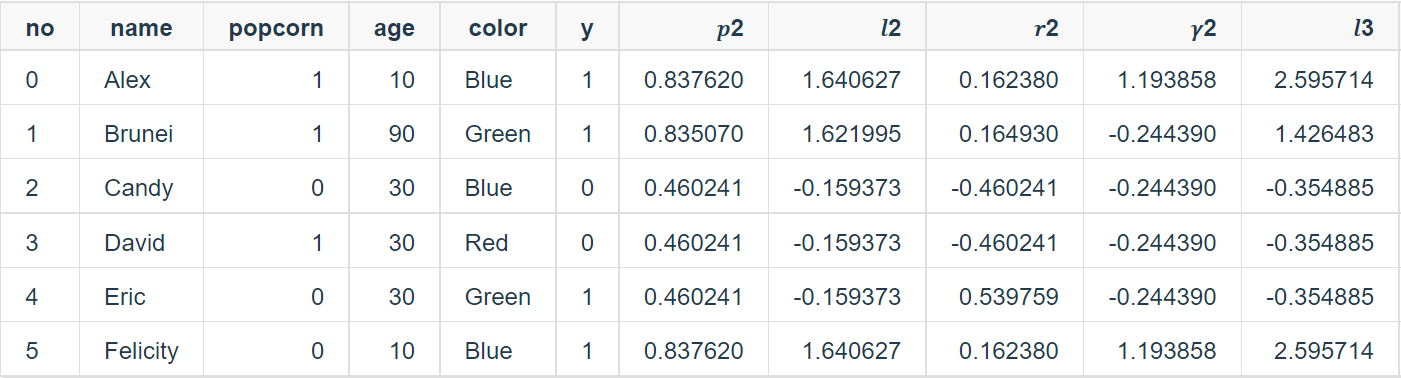

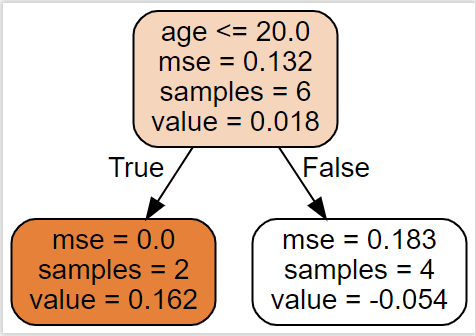

https://ericwebsmith.github.io/2020/04/19/GradientBoostingClassification/

___

### Example for Gradient_Boosting_Classification

https://towardsdatascience.com/gradient-boosting-classification-explained-through-python-60cc980eeb3d

In [9]:
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.datasets import load_breast_cancer

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

In [11]:
df = pd.DataFrame(load_breast_cancer()['data'],
columns = load_breast_cancer()['feature_names'])

In [12]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [13]:
df['y'] = load_breast_cancer()['target']
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [14]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [15]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
y.value_counts()

1    357
0    212
Name: y, dtype: int64

In [17]:
kf = KFold(n_splits=5,random_state=42,shuffle=True)

In [18]:
for train_index,val_index in kf.split(X):
    X_train,X_val = X.iloc[train_index],X.iloc[val_index],
    y_train,y_val = y.iloc[train_index],y.iloc[val_index]

Here, we define our features and our label, and split ur data into a train and validation using 5 Fold cross validation.

In [19]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)

In [20]:
gradient_booster.fit(X_train,y_train)

GradientBoostingClassifier()

In [21]:
gradient_booster.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [22]:
print(classification_report(y_val,gradient_booster.predict(X_val)))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96        46
           1       0.96      0.99      0.97        67

    accuracy                           0.96       113
   macro avg       0.97      0.96      0.96       113
weighted avg       0.96      0.96      0.96       113



#### Accuracy is 96 %

In [23]:
X.iloc[0,:].values

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [24]:
X.iloc[0,:].shape

(30,)

In [25]:
X.iloc[0,:].values.reshape(1,30)

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01]])

In [26]:
X.iloc[0,:].values.reshape(1,30).shape

(1, 30)

In [27]:
gradient_booster.predict(X.iloc[0,:].values.reshape(1,30))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


array([0])

___